#  Import necessary libraries

In [1]:
import pandas as pd
import re
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load and take only necessary data

In [2]:
data = pd.read_csv("H:\\Guvi\\Project\\Final project\\Project 1 (Twitter sentiment analysis)\\twitter_new.csv", encoding='latin-1', header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [4]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'tweets']

In [6]:
data.head()

,target,ids,date,flag,user,tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
data = data[['target', 'tweets']]

In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   tweets  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


,target,tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Data Preprocessing

In [9]:
def preprocess_tweets(tweets):
    tweets = re.sub(r'http\S+|www\S+|https\S+', '', tweets)  # Remove URLs
    tweets = re.sub(r'#\w+', '', tweets)  # Remove hashtags
    tweets = re.sub(r'@\w+', '', tweets)  # Remove mentions
    tweets = re.sub(r'[^\w\s]', '', tweets)# Remove special characters
    tweets = re.sub(r'[0-9]', '', tweets) #Remove numbers
    tweets = tweets.lower()  # Convert to lowercase
    tweets = ' '.join(word for word in tweets.split() if word not in stopwords.words('english'))  # Remove stopwords
    return tweets

data['clean_tweets'] = data['tweets'].apply(preprocess_tweets)

In [15]:
data.head()

,target,tweets,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   tweets        1600000 non-null  object
 2   clean_tweets  1600000 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


In [12]:
data.isna().sum()

target          0
tweets          0
clean_tweets    0
dtype: int64

In [13]:
data.to_csv("H:\\Guvi\\Project\\Final project\\Project 1 (Twitter sentiment analysis)\\cleaned_tweets.csv", index=False)

In [14]:
df = pd.read_csv("H:\\Guvi\\Project\\Final project\\Project 1 (Twitter sentiment analysis)\\cleaned_tweets.csv")
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   tweets        1600000 non-null  object
 2   clean_tweets  1592407 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


target             0
tweets             0
clean_tweets    7593
dtype: int64

In [17]:
tokenized_tweet = data['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet

0          [thats, bummer, shoulda, got, david, carr, thi...
1          [upset, cant, update, facebook, texting, might...
2          [dived, many, times, ball, managed, save, rest...
3                    [whole, body, feels, itchy, like, fire]
4                             [behaving, im, mad, cant, see]
                                 ...                        
1599995                  [woke, school, best, feeling, ever]
1599996    [thewdbcom, cool, hear, old, walt, interviews, â]
1599997                [ready, mojo, makeover, ask, details]
1599998    [happy, th, birthday, boo, alll, time, tupac, ...
1599999                                              [happy]
Name: clean_tweets, Length: 1600000, dtype: object

In [18]:
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x])
tokenized_tweet.head()

0    [that, bummer, shoulda, got, david, carr, thir...
1    [upset, cant, updat, facebook, text, might, cr...
2    [dive, mani, time, ball, manag, save, rest, go...
3               [whole, bodi, feel, itchi, like, fire]
4                          [behav, im, mad, cant, see]
Name: clean_tweets, dtype: object

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['clean_tweets'] = tokenized_tweet
data.head()

,target,tweets,clean_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda got david carr third day
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest go bound
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",behav im mad cant see


# EDA

In [20]:
#frequent words
all_words = ''.join([x for x in data['clean_tweets']])
wordcloud = WordCloud(width=1000, height=750, random_state=42, max_font_size=100).generate(all_words) 

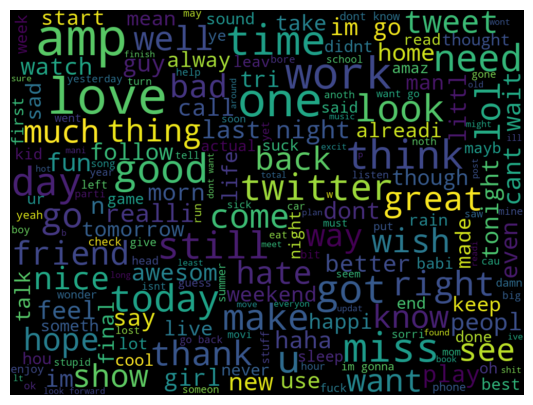

In [21]:
#graph to visualize
plt.figure(figsize=(18,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction

In [22]:
X = data['clean_tweets']
y = data['target']

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

# Model Selection and Training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Logistic Regression

In [25]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred)
classification_report1 = classification_report(y_test, y_pred)
confusion_matrix1 = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy_logistic)
print('Classification Report:')
print(classification_report1)
print('Confusion Matrix:')
print(confusion_matrix1)

C:\Users\vijai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.771245
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77    199581
           4       0.76      0.79      0.78    200419

    accuracy                           0.77    400000
   macro avg       0.77      0.77      0.77    400000
weighted avg       0.77      0.77      0.77    400000

Confusion Matrix:
[[149723  49858]
 [ 41644 158775]]


Random Forest

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred)
classification_report2 = classification_report(y_test, y_pred)
confusion_matrix2 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_random_forest)
print("Classification Report:")
print(classification_report2)
print("Confusion Matrix:")
print(confusion_matrix2)

Support Vector Machine

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
classification_report3 = classification_report(y_test, y_pred)
confusion_matrix3 = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report3)
print("Confusion Matrix:")
print(confusion_matrix3)

Comparing accuracy of logistic, random forest and svm using bar chart

In [ ]:
# Accuracy scores of the models
accuracy_scores = [accuracy_logistic, accuracy_random_forest, accuracy_svm]
models = ['Logistic Regression', 'Random Forest', 'SVM']

# Plotting the bar graph
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')
plt.ylim([0, 1])  # Set the y-axis range from 0 to 1
plt.show()